<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/14_1_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.5 MB/s eta 0:00:00


## 14.1 Image Augmentation

In [4]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

### 14.1.1 Common Image Augmentation Methods

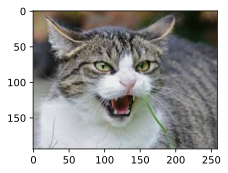

In [9]:
d2l.set_figsize()
img = d2l.Image.open('cat.jpg')
d2l.plt.imshow(img);

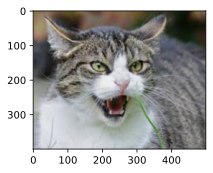

In [11]:
import torchvision.transforms as T

transform = T.Resize((400, 500))
img = transform(img)
d2l.plt.imshow(img);

In [14]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
  Y = [aug(img) for _ in range(num_rows * num_cols)]
  d2l.show_images(Y, num_rows, num_cols, scale=scale)

#### Flipping and Cropping

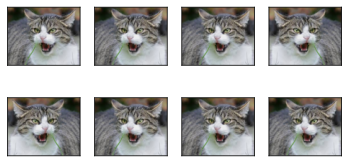

In [15]:
apply(img, T.RandomHorizontalFlip())

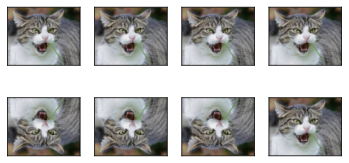

In [16]:
apply(img, T.RandomVerticalFlip())

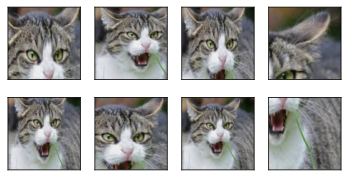

In [17]:
shape_aug = T.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))

apply(img, shape_aug)

#### Changing Colors

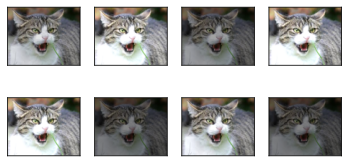

In [18]:
apply(img, T.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

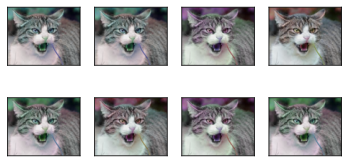

In [19]:
apply(img, T.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

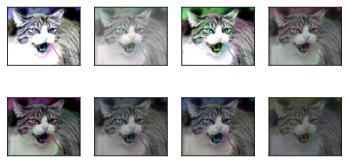

In [22]:
color_aug = T.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

#### Combining Multiple Image AUgmentation Methods

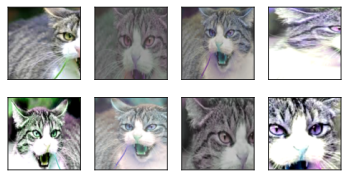

In [24]:
augs = T.Compose([
    T.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)